# EDA (Exploratory Data Analysis)

1. load datasets

2. Clean data (missing values,duplicates,types)

3. treat outliers

4. Univariate & bivariate and multivariate anlaysis

5. insights


Outlier - A data point that is significantly different from other observations in a dataset.

How outliers will come ---?
1. Measurement errors
2. data entry mistakes

Why they are important---?
1. They can be errors
2. They effect the data anlysis.

How to identify the outliers----?
1. Statistical Methods

----> Interquartile Range (IQR)

----> Z-Score 

2. Visualization Tech
----> Box Plots

---->Scatter plots

---->Histogram

### Univariate analysis - a method that analyzes a single variable to describe its characteristics , find patterns and summarize data.
#### It involves only one variable.
### Bivariate analysis - It will give the relationship b/w 2 variables. it helps to find if there is an co-relation , association or connection b/w the 2 variables.
#### It involves 2 variables (eg: (x&y))
### Multivariate analysis - To understand how multiple factors interact and influence each other.
#### It involves more than 2
Example -
How our age,Income and education level together influence the purchasing behavior.

## ETL


## ELT

## EDA : < Dataset >

1. Load & Overview

2. Cleaning (missing, duplicates, dtypes)

3. Uni, Bi, Multi analysis

4. Outlier - IQR

5. Feature Engineering

6. Key Insights

### Feature Engineering - " FE is the process of turning raw data into useful features " that helps to improve the performance of machine learning models.

# 1. Load libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Basic information & overview 
print("Shape of dataset:",df.shape)
print("\n data info \n")
df.info()
print("total decription \n",df.describe())

Shape of dataset: (891, 15)

 data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
total decription 
          survived 

In [5]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
missing.sort_values(by='missing_percent', ascending=False)


,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [6]:
df['age']=df['age'].fillna(df['age'].mean())

In [7]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'], inplace=True)

In [8]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
missing.sort_values(by='missing_percent', ascending=False)


,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


Insights : we filled important columns and removed highly missing ones.

This keeps maximum information while making the dataset clean

In [12]:
# Duplicates
print('Duplicate rows:',df.duplicated().sum())

# Convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.5+ KB


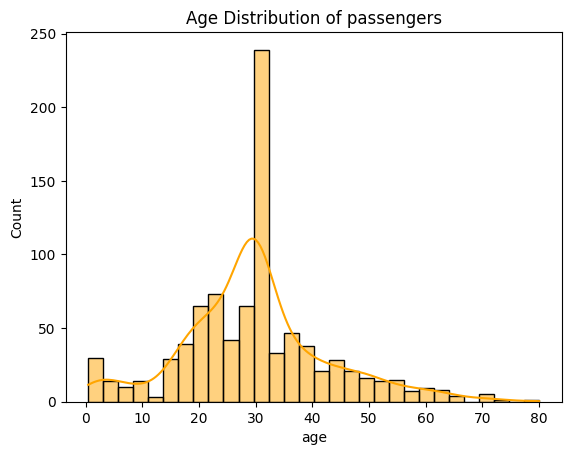

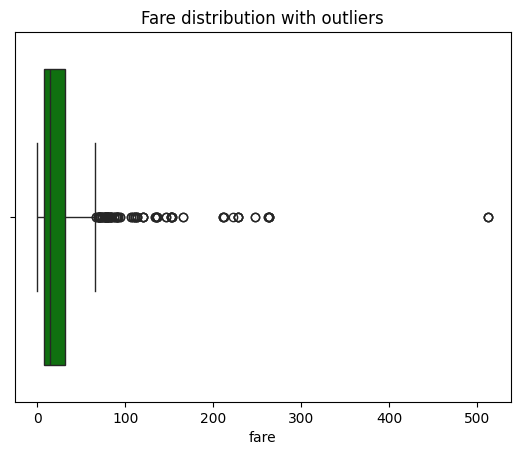

In [15]:
# 6. Univariate analysis - Numerical Features
nums_cols=df.select_dtypes(include=['float64','int64']).columns
df[nums_cols].describe()

# Histogram : Age
sns.histplot(df['age'],bins=30,kde=True,color='orange')
plt.title('Age Distribution of passengers')
plt.show()

#Box plot:Fare
sns.boxplot(x=df['fare'],color='green')
plt.title("Fare distribution with outliers")
plt.show()

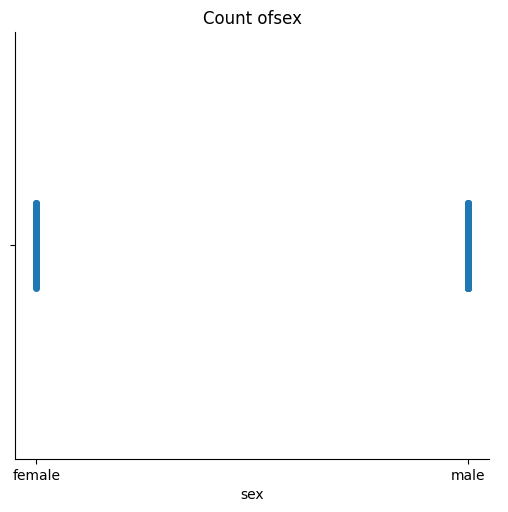

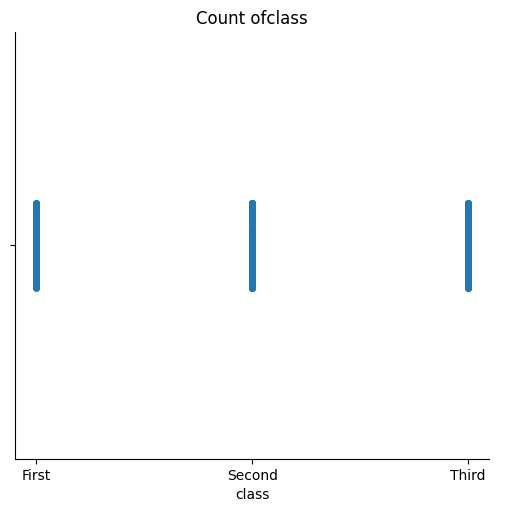

In [16]:
cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of{col}")
    plt.show()

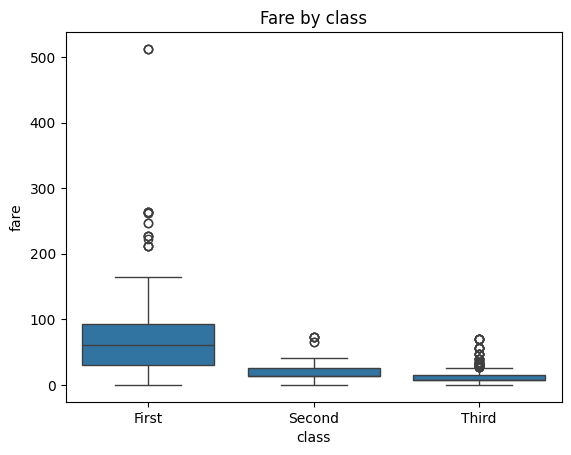

In [17]:
# Bivariate anlaysis numerical vs categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title('Fare by class')
plt.show()

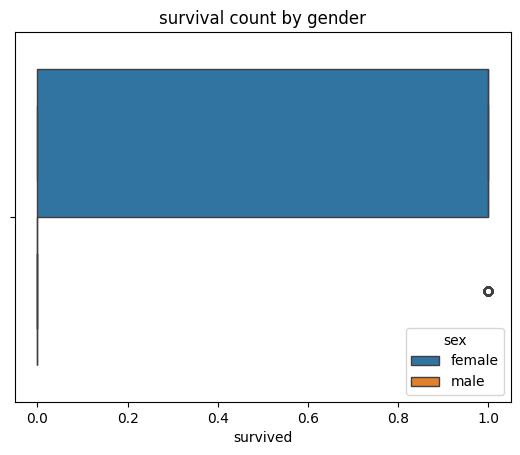

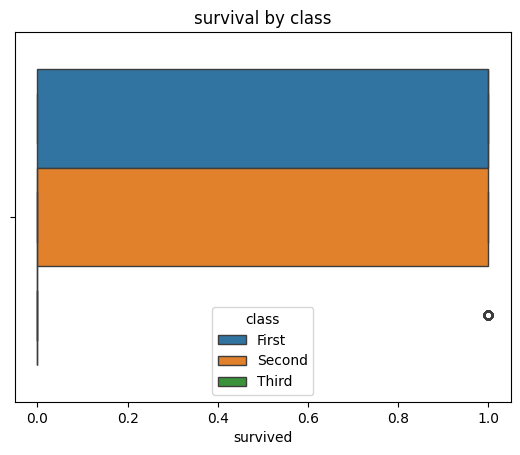

In [ ]:
# Bivariate anlaysis categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('survival count by gender')
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title('survival count by class')
plt.show()

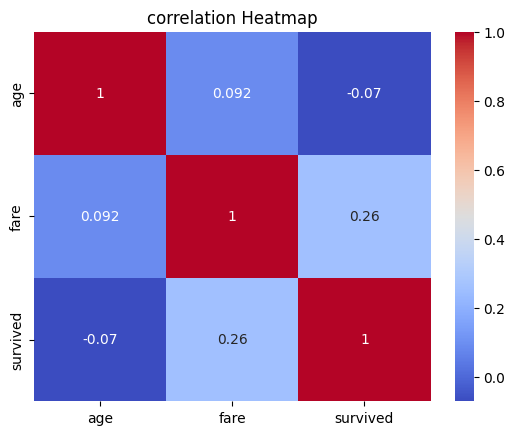

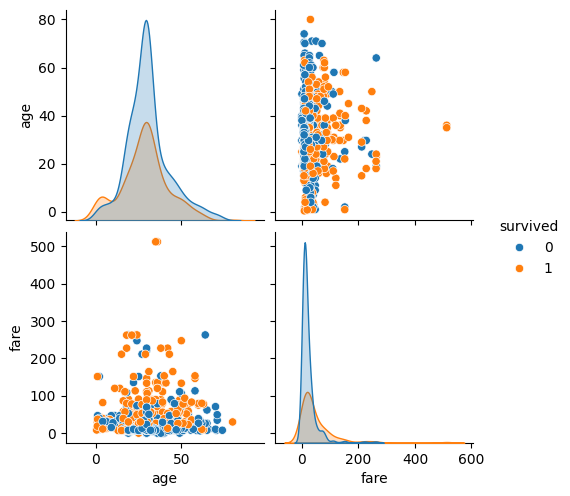

In [23]:
# corelation and multivariate analysis

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Insights:

1.Fare has a positive correlation with survival

2.Age shows a slight negative correlation with survival

Number of outlier in fare : 116


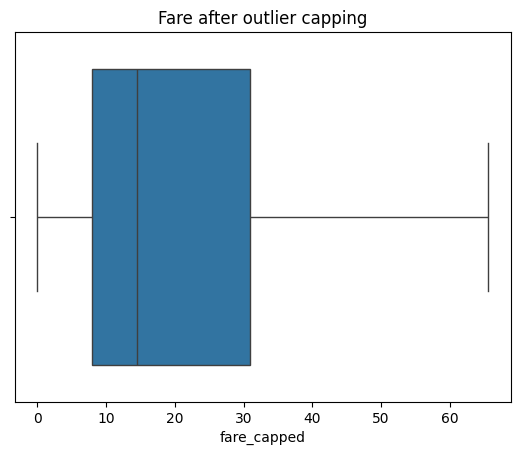

In [24]:
# outlier Detection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("Number of outlier in fare :",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

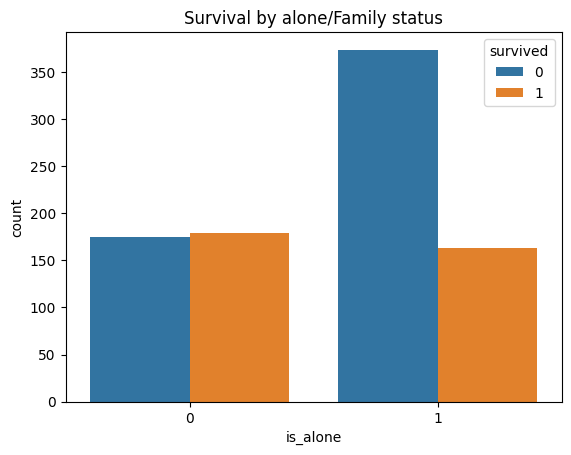

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [29]:
# Feature Engineering 

# Create new Features

df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title('Survival by alone/Family status')
plt.show()

df[['family_size','is_alone','survived']].head()

In [26]:
df.to_csv("Titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")


 Cleaned Titanic data saved as titanic_cleaned.csv


In [28]:
import os
print(os.getcwd())

c:\Users\Bunny\OneDrive\Documents\23B81A7252Tech\week6_day1
